# Praktikum 10 Support Vector Machine

# NRP   : 2172019 
# Nama : Thoriq Hidayansyah

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_drug = pd.read_csv("drug200.csv")

In [3]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


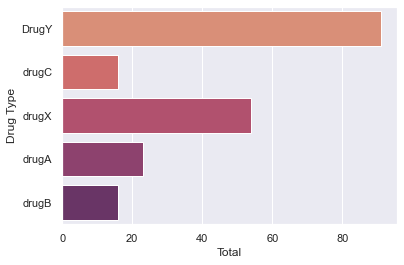

In [5]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

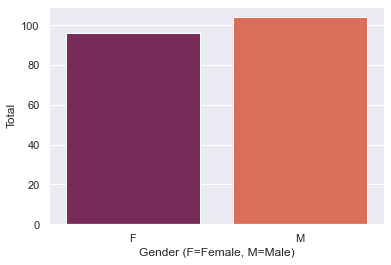

In [6]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df_drug, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

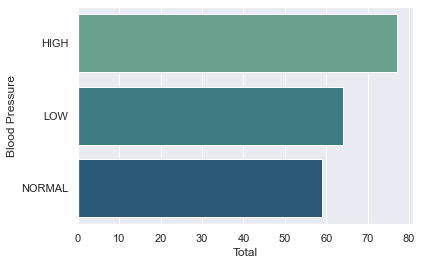

In [7]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df_drug, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

In [8]:
X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [11]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVCclassifier = SVC(kernel = 'linear')
SVCclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      0.96      0.98        26
       drugA       1.00      1.00      1.00         7
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.95      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60

[[25  0  1  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]


In [13]:
from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

SVC accuracy is: 98.33%


In [14]:
SVCclassifier.coef_

array([[ 2.80938349e-02,  9.68930324e-01,  9.41535517e-02,
        -9.41535517e-02, -3.33537216e-01,  3.06090891e-01,
         2.74463249e-02, -4.54630724e-01,  4.54630724e-01],
       [-4.19454916e-02,  9.92895106e-01, -1.88292400e-01,
         1.88292400e-01, -5.67745202e-01,  3.20733595e-01,
         2.47011607e-01, -1.64067913e-02,  1.64067913e-02],
       [ 2.55976026e-02,  9.21061722e-01,  9.22889932e-02,
        -9.22889932e-02,  6.35321673e-02, -6.35321673e-02,
         0.00000000e+00, -6.35321673e-02,  6.35321673e-02],
       [-2.50284234e-02,  1.58829511e+00, -1.16878299e-01,
         1.16878299e-01,  2.72723108e-01,  9.96748213e-02,
        -3.72397929e-01,  3.86423467e-01, -3.86423467e-01],
       [-5.63182647e-01, -3.47028270e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.02635505e-02, -5.02635505e-02],
       [-1.24951107e-05, -1.08711638e-04,  1.95796949e-04,
        -1.95796949e-04,  1.00000832e+00, -1.000008

In [15]:
SVCclassifier.intercept_

array([-1.48635814e+01, -1.19655731e+01, -1.40435031e+01, -2.20496585e+01,
        3.17083688e+01,  1.95519813e-03, -3.33091148e-01, -1.07028771e+00,
       -3.33751264e-01, -1.00038408e+00])

In [16]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 

In [17]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(SVC(), param_grid)

In [18]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

In [19]:
print(grid_search_cv.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [20]:
grid_search_cv.best_score_

0.9857142857142858

In [21]:
tunning_accuracy = grid_search_cv.predict(X_test)

In [22]:
print(classification_report(y_test, tunning_accuracy))

              precision    recall  f1-score   support

       DrugY       1.00      0.96      0.98        26
       drugA       1.00      1.00      1.00         7
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.95      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60



In [23]:
SVC_tunning_accuracy = accuracy_score(tunning_accuracy ,y_test)
print('SVC tunning accuracy is: {:.2f}%'.format(SVC_tunning_accuracy*100))

SVC tunning accuracy is: 98.33%
